In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
import random
random.seed(100)

In [2]:
df = pd.read_csv("datasets/downsampled_smoking_driking_dataset.csv")

label_encoder = LabelEncoder()
df['SMK_stat_type_cd'] = label_encoder.fit_transform(df['SMK_stat_type_cd'])
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,50,150,50,72.0,2.0,1.5,1.0,1.0,120.0,...,138.0,57.0,13.3,1.0,0.6,17.0,8.0,26.0,0,1
1,0,35,160,60,81.0,0.5,0.6,1.0,1.0,93.0,...,117.0,30.0,11.3,1.0,0.8,20.0,7.0,10.0,0,1
2,0,30,160,60,80.0,1.0,1.2,1.0,1.0,103.0,...,92.0,103.0,14.0,1.0,0.6,20.0,34.0,17.0,0,1
3,0,55,155,55,76.0,0.8,0.8,1.0,1.0,120.0,...,95.0,221.0,13.7,1.0,0.6,20.0,14.0,27.0,0,1
4,0,45,160,60,84.0,1.2,1.2,1.0,1.0,121.0,...,133.0,274.0,13.4,1.0,0.7,14.0,11.0,16.0,0,1


# Feature Selection

In [4]:
df['bmi'] = (df['weight'] / ((df['height'] ** 2)) * 10000).round(1)
df.drop(columns=["height","weight"], inplace=True)

if df.var()["tot_chole"]>df.var()["LDL_chole"]:
    df.drop(columns=["tot_chole"], inplace=True)
    print("Drop column 'tot_chole'")
df.head(5)

Drop column 'tot_chole'


,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,bmi
0,0,50,72.0,2.0,1.5,1.0,1.0,120.0,86.0,82.0,...,57.0,13.3,1.0,0.6,17.0,8.0,26.0,0,1,22.2
1,0,35,81.0,0.5,0.6,1.0,1.0,93.0,53.0,85.0,...,30.0,11.3,1.0,0.8,20.0,7.0,10.0,0,1,23.4
2,0,30,80.0,1.0,1.2,1.0,1.0,103.0,62.0,81.0,...,103.0,14.0,1.0,0.6,20.0,34.0,17.0,0,1,23.4
3,0,55,76.0,0.8,0.8,1.0,1.0,120.0,80.0,114.0,...,221.0,13.7,1.0,0.6,20.0,14.0,27.0,0,1,22.9
4,0,45,84.0,1.2,1.2,1.0,1.0,121.0,80.0,102.0,...,274.0,13.4,1.0,0.7,14.0,11.0,16.0,0,1,23.4


In [32]:
df.to_csv("datasets/downsampled_dataset_after_feature_selection.csv",index=False)

# Training dataset and test dataset

In [5]:
# sampled_df = df.sample(frac=0.01,replace=False,ignore_index=True)

# X = sampled_df.drop(['SMK_stat_type_cd','DRK_YN'], axis=1)
# y_smoke = sampled_df['SMK_stat_type_cd']
# y_drink = sampled_df['DRK_YN']

# # Split the dataset into a training set (80%) and a test set (20%)
# x_smk_train, x_smk_test, y_smk_train, y_smk_test = train_test_split(X, y_smoke, test_size=0.2, random_state=100)
# x_dk_train, x_dk_test, y_dk_train, y_dk_test = train_test_split(X, y_drink, test_size=0.2, random_state=100)

In [6]:
X = df.drop(['SMK_stat_type_cd','DRK_YN'], axis=1)
y_smoke = df['SMK_stat_type_cd']
y_drink = df['DRK_YN']

# Split the dataset into a training set (80%) and a test set (20%)
x_smk_train, x_smk_test, y_smk_train, y_smk_test = train_test_split(X, y_smoke, test_size=0.2, random_state=42)
x_dk_train, x_dk_test, y_dk_train, y_dk_test = train_test_split(X, y_drink, test_size=0.2, random_state=42)

# Baseline Model -- DummyClassifier

## Drinking

In [7]:
dummy_clf = DummyClassifier(strategy="prior")
# Fit the baseline classifier on the training data
dummy_clf.fit(x_dk_train, y_dk_train)
# Make predictions on the test data
y_dk_pred = dummy_clf.predict(x_dk_test)

# Calculate accuracy and other metrics
dk_accuracy = accuracy_score(y_dk_test, y_dk_pred)
# dk_report = classification_report(y_dk_test, y_dk_pred)

# Print the results
print("Baseline Classifier Accuracy:", dk_accuracy)
# print(f"Classification Report:\n{dk_report}")

Baseline Classifier Accuracy: 0.495


## Smoking

In [8]:
dummy_clf = DummyClassifier(strategy="prior")
# Fit the baseline classifier on the training data
dummy_clf.fit(x_smk_train, y_smk_train)
# Make predictions on the test data
y_smk_pred = dummy_clf.predict(x_smk_test)

# Calculate accuracy and other metrics
smk_accuracy = accuracy_score(y_smk_test, y_smk_pred)
# smk_report = classification_report(y_smk_test, y_smk_pred)

# Print the results
print("Baseline Classifier Accuracy:", smk_accuracy)
# print(f"Classification Report:\n{smk_report}")


Baseline Classifier Accuracy: 0.325


# Building Models

## Defining Base Models

In [9]:
def base_models():
  models = dict()
  models['Logistic'] = LogisticRegression(max_iter=10000)
  models["NB"] = GaussianNB()
  models["KNN"] = KNeighborsClassifier(n_neighbors=20)
  models["Decision Tree"] = DecisionTreeClassifier()
  models["Random Forest"] = RandomForestClassifier()
  models["GB"] = GradientBoostingClassifier()
  models["XGB"] = XGBClassifier()
  models["Bagging"] = BaggingClassifier(n_estimators=100)
  models["SVM"] = SVC()
  models['QDA'] = QuadraticDiscriminantAnalysis()
  models['AdaBoost'] = AdaBoostClassifier()
  models['MLP'] = MLPClassifier()
  return models

models = base_models()

## Base Models' Evaluation

In [10]:
# Function to evaluate the list of models
def eval_models(model):
  cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
  scores = cross_val_score(model, x_dk_train, y_dk_train, scoring='accuracy', 
                           cv=cv, n_jobs=5, error_score='raise')
  return scores

### Drinking Status as the Target Variable

In [11]:
# evaluate the models and store results
dk_results, dk_names = list(), list()

for name, model in models.items():
  dk_scores = eval_models(model)
  dk_results.append(dk_scores)
  dk_names.append(name)
  print('>%s %.3f (%.3f)' % (name, dk_scores.mean(), dk_scores.std()))


dk_classmod = pd.DataFrame(np.transpose(dk_results), columns = ["Logistic","NB","KNN","Decision Tree","Random Forest","GB","XGB","Bagging","SVM","QDA","AdaBoost","MLP"])
dk_classmod = pd.melt(dk_classmod.reset_index(), id_vars='index',value_vars=["Logistic","NB","KNN","Decision Tree","Random Forest","GB","XGB","Bagging","SVM","QDA","AdaBoost","MLP"])


>Logistic 0.672 (0.016)
>NB 0.575 (0.016)
>KNN 0.633 (0.017)
>Decision Tree 0.586 (0.020)
>Random Forest 0.665 (0.017)
>GB 0.671 (0.017)
>XGB 0.655 (0.019)
>Bagging 0.660 (0.017)
>SVM 0.667 (0.014)
>QDA 0.576 (0.022)
>AdaBoost 0.664 (0.016)
>MLP 0.648 (0.026)


In [12]:
dk_fig = px.box(dk_classmod, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Base Model Performance for Drinking Status Prediction")
dk_fig.show()

### Smoking Status as the Target Variable

In [13]:
# evaluate the models and store results
smk_results, smk_names = list(), list()

for name, model in models.items():
  smk_scores = eval_models(model)
  smk_results.append(smk_scores)
  smk_names.append(name)
  print('>%s %.3f (%.3f)' % (name, smk_scores.mean(), smk_scores.std()))


smk_classmod = pd.DataFrame(np.transpose(smk_results), columns = ["Logistic","NB","KNN","Decision Tree","Random Forest","GB","XGB","Bagging","SVM","QDA","AdaBoost","MLP"])
smk_classmod = pd.melt(smk_classmod.reset_index(), id_vars='index', value_vars=["Logistic","NB","KNN","Decision Tree","Random Forest","GB","XGB","Bagging","SVM","QDA","AdaBoost","MLP"])


>Logistic 0.672 (0.016)
>NB 0.575 (0.016)
>KNN 0.633 (0.017)
>Decision Tree 0.584 (0.020)
>Random Forest 0.664 (0.017)
>GB 0.672 (0.017)
>XGB 0.655 (0.019)
>Bagging 0.660 (0.019)
>SVM 0.667 (0.014)
>QDA 0.576 (0.022)
>AdaBoost 0.664 (0.016)
>MLP 0.650 (0.025)


In [14]:
smk_fig = px.box(smk_classmod, x="variable", y="value",color="variable",points='all',
                 labels={"variable": "Machine Learning Model",
                         "value": "Accuracy"},
                 title="Base Model Performance for Smoking Status Prediction")
smk_fig.show()

## Stacking models

In [15]:
# get a stacking ensemble of models
def get_stacking(level0_models):
  level0_candidates = {"Logistic": ('Logistic', LogisticRegression(max_iter=10000)),
                       "NB": ('NB', GaussianNB()),
                       "KNN": ('KNN', KNeighborsClassifier(n_neighbors=20)),
                       "Decision Tree": ('Decision Tree', DecisionTreeClassifier()),
                       "Random Forest": ('Random Forest', RandomForestClassifier()),
                       "GB": ('GB', GradientBoostingClassifier()),
                       "XGB": ('XGB', XGBClassifier()),
                       "Bagging": ('Bagging', BaggingClassifier(n_estimators=100)),
                       "SVM": ('SVM', SVC()),
                       "QDA": ('QDA', QuadraticDiscriminantAnalysis()),
                       "AdaBoost": ('AdaBoost', AdaBoostClassifier()),
                       "MLP": ('MLP', MLPClassifier())}
  level0 = [level0_candidates[m] for m in level0_models]

	# define meta learner model
  level1 = LogisticRegression()
	# define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model


def base_and_stacked_models(best_base_models):
  best_models_candidates = {"Logistic": LogisticRegression(max_iter=10000),
                       "NB": GaussianNB(),
                       "KNN": KNeighborsClassifier(n_neighbors=20),
                       "Decision Tree": DecisionTreeClassifier(),
                       "Random Forest": RandomForestClassifier(),
                       "GB": GradientBoostingClassifier(),
                       "XGB": XGBClassifier(),
                       "Bagging": BaggingClassifier(n_estimators=100),
                       "SVM": SVC(),
                       "QDA": QuadraticDiscriminantAnalysis(),
                       "AdaBoost": AdaBoostClassifier(),
                       "MLP": MLPClassifier()}
  models = dict()
  for bm in best_base_models:
    models[bm] = best_models_candidates[bm]
  models["Stacked Model"] = get_stacking(best_base_models)
  return models

### Drinking Status as the Target Variable

In [16]:
# Calculate the mean accuracy scores for all models
mean_scores = [np.mean(scores) for scores in dk_results]

# Sort the model names by mean accuracy scores in descending order
sorted_model_names = [name for _, name in sorted(zip(mean_scores, dk_names), reverse=True)]

# Select the top 5 models
dk_best_models = sorted_model_names[:5]

print("The best base models for drinking status prediction are:")
for model_name in dk_best_models:
    print(model_name)

The best base models for drinking status prediction are:
Logistic
GB
SVM
Random Forest
AdaBoost


In [17]:
# get the models to evaluate
dk_models_with_stacking = base_and_stacked_models(dk_best_models)
# evaluate the models and store results
dk_results_with_stacking, dk_names = list(), list() 

for name, model in dk_models_with_stacking.items():
  dk_scores_with_stacking = eval_models(model)
  dk_results_with_stacking.append(dk_scores_with_stacking)
  dk_names.append(name)
  print('>%s %.3f (%.3f)' % (name, dk_scores_with_stacking.mean(), dk_scores_with_stacking.std()))

>Logistic 0.672 (0.016)
>GB 0.671 (0.017)
>SVM 0.667 (0.014)
>Random Forest 0.665 (0.020)
>AdaBoost 0.664 (0.016)
>Stacked Model 0.677 (0.017)


In [18]:
dk_classmod_with_stacking = pd.DataFrame(np.transpose(dk_results_with_stacking), columns = dk_best_models+["Stacked Model"])
dk_classmod_with_stacking = pd.melt(dk_classmod_with_stacking.reset_index(), id_vars='index', value_vars=dk_best_models+["Stacked Model"])

dk_with_stacking_fig = px.box(dk_classmod_with_stacking, x="variable", y="value", color="variable", points='all',
                              labels={"variable": "Machine Learning Model",
                                      "value": "Accuracy"},
                                title="Model Performance for Drinking Status Prediction")
dk_with_stacking_fig.show()

### Smoking Status as the Target Variable

In [19]:
# Calculate the mean accuracy scores for all models
mean_scores = [np.mean(scores) for scores in smk_results]

# Sort the model names by mean accuracy scores in descending order
sorted_model_names = [name for _, name in sorted(zip(mean_scores, smk_names), reverse=True)]

# Select the top 4 models
smk_best_models = sorted_model_names[:5]

print("The best base models for smoking status prediction are:")
for model_name in smk_best_models:
    print(model_name)

The best base models for smoking status prediction are:
Logistic
GB
SVM
Random Forest
AdaBoost


In [20]:
# get the models to evaluate
smk_models_with_stacking = base_and_stacked_models(smk_best_models)
# evaluate the models and store results
smk_results_with_stacking, smk_names = list(), list() 

for name, model in smk_models_with_stacking.items():
  smk_scores_with_stacking = eval_models(model)
  smk_results_with_stacking.append(smk_scores_with_stacking)
  smk_names.append(name)
  print('>%s %.3f (%.3f)' % (name, smk_scores_with_stacking.mean(), smk_scores_with_stacking.std()))

>Logistic 0.672 (0.016)
>GB 0.671 (0.017)
>SVM 0.667 (0.014)
>Random Forest 0.666 (0.019)
>AdaBoost 0.664 (0.016)
>Stacked Model 0.677 (0.017)


In [21]:
smk_classmod_with_stacking = pd.DataFrame(np.transpose(smk_results_with_stacking), columns = smk_best_models+["Stacked Model"])
smk_classmod_with_stacking = pd.melt(smk_classmod_with_stacking.reset_index(), id_vars='index', value_vars=smk_best_models+["Stacked Model"])

smk_with_stacking_fig = px.box(smk_classmod_with_stacking, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": "Accuracy"
        },title="Model Performance for Smoking Status Prediction")
smk_with_stacking_fig.show()

## Save the Single Stacked model

In [22]:
dk_stacked_model = get_stacking(dk_best_models)
dk_stacked_model.fit(x_dk_train, y_dk_train)

smk_stacked_model = get_stacking(smk_best_models)
smk_stacked_model.fit(x_smk_train, y_smk_train)

import pickle

# Save to file in the current working directory
pkl_filename = [("StackedPickleDrinking.pkl", dk_stacked_model), ("StackedPickleSmoking.pkl", smk_stacked_model)]
for i in range(2):
    with open(pkl_filename[i][0], 'wb') as file:
        pickle.dump(pkl_filename[i][1], file)

## Making Prediction using Stacked models

### Drinking

In [23]:
# Load from file
with open(pkl_filename[0][0], 'rb') as file:
    pickle_model = pickle.load(file)

dk_score = pickle_model.score(x_dk_test, y_dk_test)
print("Test score: {0:.2f} %".format(100 * dk_score))
dk_y_predict = pickle_model.predict(x_dk_test)

Test score: 67.28 %


Confusion Matrix:
[[589 302]
 [287 622]]



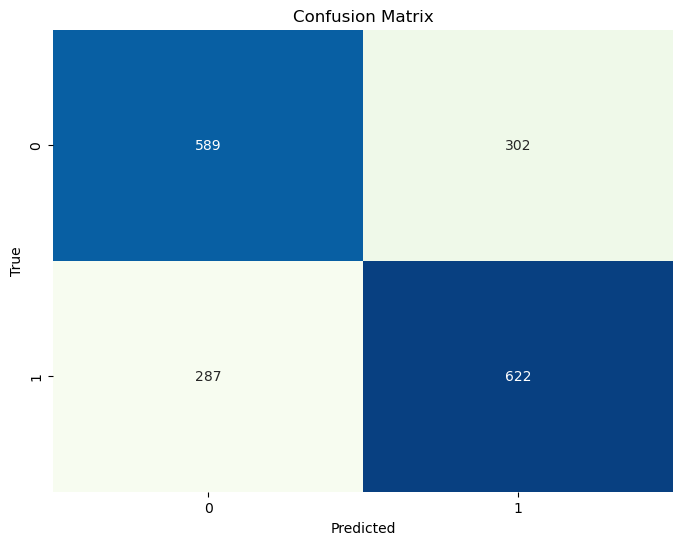

In [24]:
# Calculate the confusion matrix
dk_conf_matrix = confusion_matrix(y_dk_test, dk_y_predict)

# Display the confusion matrix as text
print(f"Confusion Matrix:\n{dk_conf_matrix}\n")

# Display the confusion matrix as a visual plot
plt.figure(figsize=(8, 6))
sns.heatmap(dk_conf_matrix, annot=True, fmt='d', cmap='GnBu',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Smoking

In [25]:
# Load from file
with open(pkl_filename[1][0], 'rb') as file:
    pickle_model = pickle.load(file)

smk_score = pickle_model.score(x_smk_test, y_smk_test)
print("Test score: {0:.2f} %".format(100 * smk_score))
smk_y_predict = pickle_model.predict(x_smk_test)

Test score: 62.33 %


Confusion Matrix:
[[393  85 107]
 [ 38 359 204]
 [ 56 188 370]]



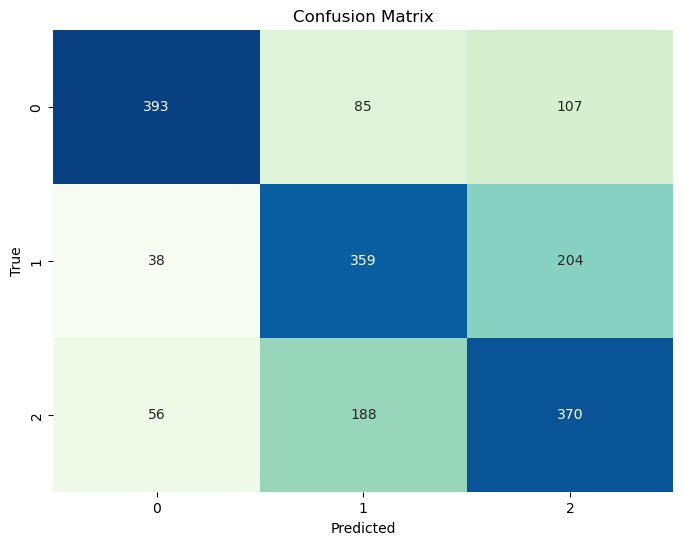

In [26]:
# Calculate the confusion matrix
smk_conf_matrix = confusion_matrix(y_smk_test, smk_y_predict)

# Display the confusion matrix as text
print(f"Confusion Matrix:\n{smk_conf_matrix}\n")

# Display the confusion matrix as a visual plot
plt.figure(figsize=(8, 6))
sns.heatmap(smk_conf_matrix, annot=True, fmt='d', cmap='GnBu',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Checking Feature Importance

In [27]:
def feature_importances(base_models, x_train, y_train):
    best_models_candidates = {"Logistic": LogisticRegression(max_iter=10000),
                    "NB": GaussianNB(),
                    "KNN": KNeighborsClassifier(n_neighbors=20),
                    "Decision Tree": DecisionTreeClassifier(),
                    "Random Forest": RandomForestClassifier(),
                    "GB": GradientBoostingClassifier(),
                    "XGB": XGBClassifier(),
                    "Bagging": BaggingClassifier(n_estimators=100),
                    "SVM": SVC(),
                    "QDA": QuadraticDiscriminantAnalysis(),
                    "AdaBoost": AdaBoostClassifier(),
                    "MLP": MLPClassifier()}
    
    importance = []
    for bm in base_models:
        tmp_model = best_models_candidates[bm]
        tmp_model.fit(x_train, y_train)

        if bm == 'Logistic':
            tmp_importance = list(tmp_model.coef_[0])
        elif bm == 'SVM':
            tmp_importance = list(permutation_importance(tmp_model, x_train, y_train).importances_mean)
        elif bm == 'NB':
            tmp_importance = list(permutation_importance(tmp_model, x_train, y_train).importances_mean)
        elif bm == 'KNN':
            continue
        else:
            tmp_importance = list(tmp_model.feature_importances_)
        importance.append(tmp_importance)
    
    return importance
    

target_names = ['SMK_stat_type_cd','DRK_YN']
feature_names = [i for i in df.columns if i not in target_names]

### Features Importance for Best Base Models -- Drinking

In [28]:
dk_best_models_name = [i for i in dk_best_models if i!='KNN']
dk_feature_importance = feature_importances(dk_best_models, x_dk_train, y_dk_train)
dk_feature_importance = pd.DataFrame(dk_feature_importance, columns = feature_names, index=dk_best_models_name)
dk_feature_importance

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,bmi
Logistic,0.689305,-0.040983,-0.001393,0.019156,-0.001989,-0.005340,-0.292072,0.000599,0.018274,0.001921,0.028214,-0.002451,0.001079,0.047657,-0.092780,-0.427194,0.026341,-0.029092,0.014508,0.012522
GB,0.038213,0.238734,0.021779,0.002102,0.001817,0.000000,0.000339,0.016649,0.030782,0.019511,0.136343,0.028553,0.021019,0.043123,0.000740,0.017816,0.026307,0.076146,0.260254,0.019773
SVM,-0.000389,0.068778,-0.000444,0.000083,0.000056,0.000000,0.000000,-0.000750,0.001222,-0.000889,0.021528,-0.000139,0.003278,-0.001417,0.000056,0.000083,0.000750,0.026917,0.080056,-0.002722
Random Forest,0.010912,0.075824,0.059620,0.034789,0.035356,0.002418,0.002113,0.058359,0.053601,0.061869,0.083349,0.065718,0.069700,0.069342,0.005864,0.036866,0.053113,0.064546,0.102044,0.054597
AdaBoost,0.020000,0.120000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.020000,0.140000,0.080000,0.020000,0.020000,0.000000,0.080000,0.120000,0.180000,0.080000,0.060000


__Top 5 Importance Features__

In [29]:
order = np.argsort(-dk_feature_importance.values, axis=1)[:,:5]
top5_important_features_dk = pd.DataFrame(df.columns[:-3].append(df.columns[-1:])[order], 
                                           columns=['top{}'.format(i) for i in range(1,5+1)],
                                           index=dk_best_models_name)
top5_important_features_dk

,top1,top2,top3,top4,top5
Logistic,sex,hemoglobin,HDL_chole,SGOT_AST,sight_left
GB,gamma_GTP,age,HDL_chole,SGOT_ALT,hemoglobin
SVM,gamma_GTP,age,SGOT_ALT,HDL_chole,triglyceride
Random Forest,gamma_GTP,HDL_chole,age,triglyceride,hemoglobin
AdaBoost,SGOT_ALT,HDL_chole,age,SGOT_AST,serum_creatinine


### Features Importance for Best Base Models -- Smoking

In [30]:
smk_best_models_name = [i for i in smk_best_models if i!='KNN']
smk_feature_importance = feature_importances(smk_best_models, x_smk_train, y_smk_train)
smk_feature_importance = pd.DataFrame(smk_feature_importance, columns = feature_names, index=smk_best_models_name)
smk_feature_importance

,sex,age,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,bmi
Logistic,-2.040007,-0.007554,0.001449,0.052689,-0.007033,-0.012471,0.055012,0.008464,-0.004022,-0.001596,0.004122,0.000529,-0.001199,-0.036709,-0.083812,-0.036835,0.001968,-0.000947,-0.002489,0.007216
GB,0.597464,0.111289,0.013135,0.003950,0.007934,0.000596,0.000302,0.016478,0.010457,0.013546,0.022929,0.016446,0.025813,0.048350,0.000571,0.013189,0.018464,0.018420,0.031065,0.029604
SVM,0.002639,0.063500,0.027194,0.000056,-0.000028,0.000000,0.000000,0.004472,0.002000,0.004167,0.026278,0.004056,0.019694,0.008083,-0.000139,-0.000028,0.004583,0.004917,0.042250,0.005556
Random Forest,0.129999,0.056996,0.059298,0.032634,0.032375,0.002557,0.002176,0.051222,0.046810,0.055465,0.057220,0.058876,0.060324,0.088390,0.005174,0.048300,0.048052,0.051724,0.061578,0.050828
AdaBoost,0.020000,0.100000,0.040000,0.020000,0.060000,0.000000,0.000000,0.100000,0.060000,0.080000,0.040000,0.040000,0.060000,0.060000,0.000000,0.040000,0.040000,0.080000,0.080000,0.080000


__Top 5 Importance Features__

In [31]:
order = np.argsort(-smk_feature_importance.values, axis=1)[:,:5]
top5_important_features_smk = pd.DataFrame(df.columns[:-3].append(df.columns[-1:])[order], 
                                           columns=['top{}'.format(i) for i in range(1,5+1)],
                                           index=smk_best_models_name)
top5_important_features_smk

,top1,top2,top3,top4,top5
Logistic,hear_right,sight_left,SBP,bmi,HDL_chole
GB,sex,age,hemoglobin,gamma_GTP,bmi
SVM,age,gamma_GTP,waistline,HDL_chole,triglyceride
Random Forest,sex,hemoglobin,gamma_GTP,triglyceride,waistline
AdaBoost,age,SBP,BLDS,SGOT_ALT,gamma_GTP
